<a href="https://colab.research.google.com/github/somyamangla/SOMYAMANGLA/blob/main/Decision_Tree_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')

In [ ]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


##PROBLEM STATEMENT
In this data we have one independent variable that is temperature and one dependent that is revenue. Build a Decision Tree Regressor to study relationship between the varibles. This is the info about ice cream shop and thus predict the revenue for the ice cream shop on a particular temperature on that day

In [ ]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [ ]:
df.isnull()

,Temperature,Revenue
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
495,False,False
496,False,False
497,False,False
498,False,False


In [ ]:
df.isnull().sum().sum()

0

Text(0.5, 1.0, 'Temperature vs Revenue')

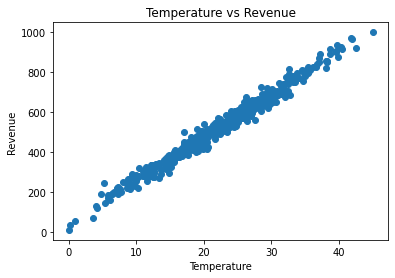

In [ ]:
plt.scatter(df.Temperature,df.Revenue)
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Temperature vs Revenue')

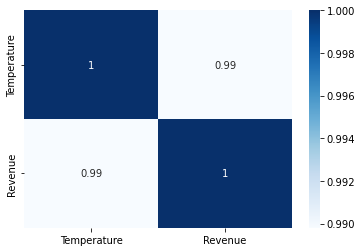

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

Some outliers must be there

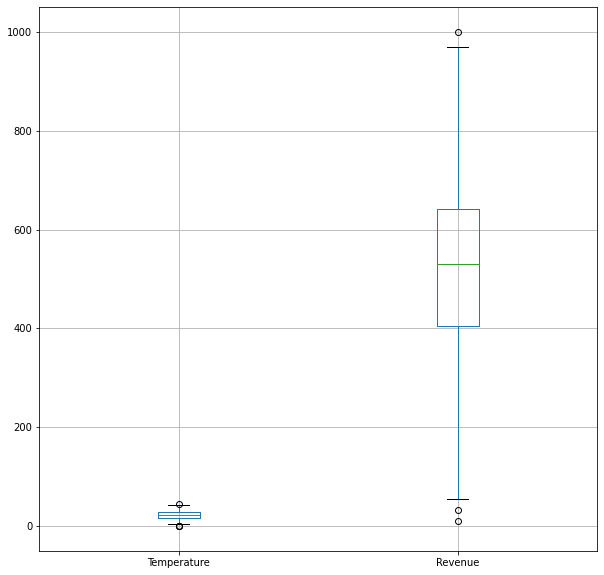

In [ ]:
plt.figure(figsize=(10,10))
df.boxplot()

In [ ]:
##can treat outliers but not necessary

Feature scaling

In [ ]:
x=np.array(df.Temperature.values)
y=np.array(df.Revenue.values)

In [ ]:
from sklearn.preprocessing import StandardScaler
stanscale=StandardScaler()
x=stanscale.fit_transform(x.reshape(-1,1))
y=stanscale.fit_transform(y.reshape(-1,1))

train test split

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
len(x_test)== len(y_test)

True

In [ ]:
regressor=DecisionTreeRegressor()

In [ ]:
#train model
regressor.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
y_pred

array([ 0.88032182,  0.74354455, -0.21821526, -1.74278724, -2.29846677,
        2.5333798 , -1.13384029, -1.54905095, -1.59410918,  0.82501096,
       -1.8594786 , -0.26269909,  0.93639544,  0.21437683, -0.74854753,
       -1.35759931, -0.74854753, -0.33387782,  1.04269495,  0.25283576,
       -0.29482373,  0.538471  , -0.71126894, -1.35759931, -1.35759931,
        0.44346191,  0.12571426,  1.44013609,  0.32408777, -0.10549898,
        0.16255527,  0.46522257,  0.0924237 ,  2.15280627, -0.66002458,
        0.75687491,  1.29197884,  0.76001397,  1.23398369,  0.78200228,
        0.03735371,  1.23398369, -0.78533995,  0.96569786, -0.14586309,
       -0.27394206,  2.5333798 , -1.59254752, -0.41716459, -0.59027527,
        1.01239389, -0.15899424, -1.00943195,  0.12005583,  0.00886707,
       -1.06006892,  0.36854457, -0.68009371,  1.44013609, -1.29912314,
        0.11075054,  0.68170472,  0.82236209,  0.058048  ,  0.03735371,
       -0.26720072,  0.96569786, -1.54905095, -0.72705984,  0.79

Text(0, 0.5, 'actual in red and pred in green')

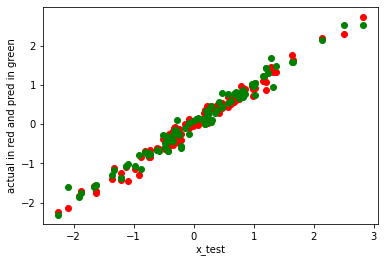

In [ ]:
plt.scatter(x_test,y_test, color='red')
plt.scatter(x_test,y_pred, color='green')
plt.xlabel('x_test')
plt.ylabel('actual in red and pred in green')

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


In [ ]:
r2_score(y_test,y_pred)

0.9586915982529739